# Criando uma escola de programação

## Leitura do link json

In [500]:
import pandas as pd
import numpy as np

In [501]:
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')

In [502]:
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')

In [503]:
nomes_f.head()

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F


In [504]:
nomes_m.head()

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M


In [505]:
# Sorteia os nomes
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
123,IVONE,0,131256,124,F
59,ISABEL,0,238919,60,F
170,MARINALVA,0,93355,171,F
64,VIVIANE,0,230213,65,F
77,MARINA,0,207760,78,F


## Criando Nomes

In [506]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [507]:
df = [nomes_f, nomes_m]

In [508]:
# Concatenar todos os nomes em um novo DataFrame
nomes = pd.concat(df)['nome'].to_frame()

## Incluindo ID dos alunos

In [509]:
np.random.seed(123)

In [510]:
total_alunos = len(nomes)
total_alunos

400

In [511]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

## Criando dominios de e-mails para alunos

In [512]:
dominios = ['@emailbolado.com.br', '@servicobolado.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [513]:
nomes

,nome,id_aluno,dominio
0,MARIA,235,@emailbolado.com.br
1,ANA,43,@servicobolado.com
2,FRANCISCA,304,@servicobolado.com
3,ANTONIA,156,@servicobolado.com
4,ADRIANA,343,@servicobolado.com
...,...,...,...
195,WALTER,231,@emailbolado.com.br
196,ARLINDO,99,@servicobolado.com
197,MICHAEL,323,@emailbolado.com.br
198,ALVARO,383,@servicobolado.com


In [514]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [515]:
nomes

,nome,id_aluno,dominio,email
0,MARIA,235,@emailbolado.com.br,maria@emailbolado.com.br
1,ANA,43,@servicobolado.com,ana@servicobolado.com
2,FRANCISCA,304,@servicobolado.com,francisca@servicobolado.com
3,ANTONIA,156,@servicobolado.com,antonia@servicobolado.com
4,ADRIANA,343,@servicobolado.com,adriana@servicobolado.com
...,...,...,...,...
195,WALTER,231,@emailbolado.com.br,walter@emailbolado.com.br
196,ARLINDO,99,@servicobolado.com,arlindo@servicobolado.com
197,MICHAEL,323,@emailbolado.com.br,michael@emailbolado.com.br
198,ALVARO,383,@servicobolado.com,alvaro@servicobolado.com


## Criando a tabela de cursos

In [516]:
# Importando bibliotecas para ler dados de tabelas de html
!pip3 install html5lib
!pip3 install lxml

In [517]:
import html5lib

In [518]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [519]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [520]:
type(cursos)

list

In [521]:
# Para alterar a variavel cursos para DataFrame
cursos = cursos[0]

In [522]:
type(cursos)

pandas.core.frame.DataFrame

In [523]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [524]:
# Melhorando o DataFrame de cursos
cursos.rename(columns={'Nome do curso' : 'nome_do_curso'}, inplace=True)

In [525]:
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [526]:
cursos['id'] = cursos.index + 1

In [527]:
cursos

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [528]:
# Alterar os indices dos DataFrame para id
cursos.set_index('id', inplace=True)

In [529]:
cursos.head(5)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


## Matriculando aluno nos cursos

In [530]:
nomes.sample(5)

,nome,id_aluno,dominio,email
46,FABIANA,358,@servicobolado.com,fabiana@servicobolado.com
38,DIEGO,294,@emailbolado.com.br,diego@emailbolado.com.br
136,NILTON,271,@emailbolado.com.br,nilton@emailbolado.com.br
119,MOISES,4,@servicobolado.com,moises@servicobolado.com
101,GISELE,298,@servicobolado.com,gisele@servicobolado.com


In [531]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [532]:
nomes.sample(7)

,nome,id_aluno,dominio,email,matriculas
153,CAUA,77,@servicobolado.com,caua@servicobolado.com,2
36,DEBORA,338,@emailbolado.com.br,debora@emailbolado.com.br,1
135,ROSILENE,387,@servicobolado.com,rosilene@servicobolado.com,2
176,CELIO,388,@servicobolado.com,celio@servicobolado.com,3
144,VINICIOS,147,@servicobolado.com,vinicios@servicobolado.com,1
16,JULIA,191,@servicobolado.com,julia@servicobolado.com,1
141,ORLANDO,159,@servicobolado.com,orlando@servicobolado.com,2


In [533]:
nomes.matriculas.describe()

count    400.000000
mean       1.920000
std        1.460799
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: matriculas, dtype: float64

In [534]:
# Utilizando a biblioteca seaborn
import seaborn as sns

<AxesSubplot:xlabel='matriculas', ylabel='Density'>

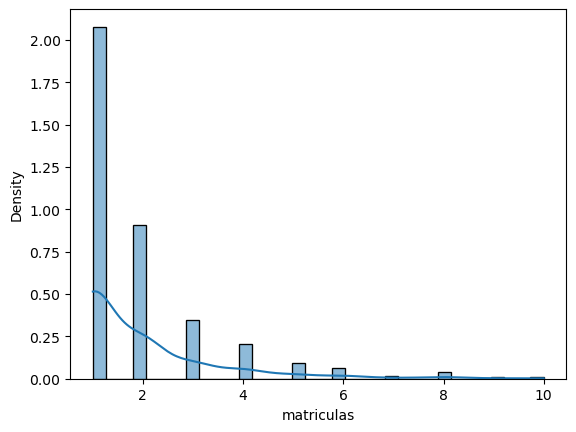

In [602]:
sns.histplot(nomes.matriculas, kde=True, stat='density')

In [536]:
nomes.matriculas.value_counts()

1     220
2      96
3      37
4      22
5      10
6       7
8       4
7       2
10      1
9       1
Name: matriculas, dtype: int64

## Selecionando os cursos

In [537]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
194,CLARA,277,@servicobolado.com,clara@servicobolado.com,1
64,ROBSON,290,@servicobolado.com,robson@servicobolado.com,1
13,DANIEL,195,@servicobolado.com,daniel@servicobolado.com,1
98,GILSON,134,@emailbolado.com.br,gilson@emailbolado.com.br,2
33,NATALIA,192,@emailbolado.com.br,natalia@emailbolado.com.br,1


In [538]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [539]:
# Vai iterar linha a linha
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p=prob)]
        todas_matriculas.append(mat)
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [540]:
matriculas

,id_aluno,id_curso
0,235,13
1,43,6
2,43,2
3,43,5
4,43,13
...,...,...
763,231,5
764,99,17
765,323,8
766,383,20


In [541]:
matriculas = matriculas.drop_duplicates()

In [542]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'qtd_alunos'})

,qtd_alunos,nome_do_curso
id_curso,,
2,33,Java para Web
3,16,C# para Web
4,6,Ruby on Rails
5,52,Cursos de Python
6,28,PHP com MySql
7,18,.NET para web
8,104,Novas integrações com Java
9,24,TDD com Java
10,7,Código limpo com C#


In [543]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
140,NILSON,361,@emailbolado.com.br,nilson@emailbolado.com.br,2
167,ANGELO,85,@servicobolado.com,angelo@servicobolado.com,1
135,RUBENS,256,@emailbolado.com.br,rubens@emailbolado.com.br,1


In [544]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [545]:
matriculas.head()

,id_aluno,id_curso
0,235,13
1,43,6
2,43,2
3,43,5
4,43,13


In [546]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'qtd_alunos'})

In [547]:
matriculas_por_curso.head()

,qtd_alunos,nome_do_curso
id_curso,,
2,33,Java para Web
3,16,C# para Web
4,6,Ruby on Rails
5,52,Cursos de Python
6,28,PHP com MySql


## Exporta tabelas para diferentes formatos

In [548]:
# csv
matriculas_por_curso.head()

,qtd_alunos,nome_do_curso
id_curso,,
2,33,Java para Web
3,16,C# para Web
4,6,Ruby on Rails
5,52,Cursos de Python
6,28,PHP com MySql


In [549]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', sep=';', index=False)

In [550]:
pd.read_csv('matriculas_por_curso.csv', sep=';')

,qtd_alunos,nome_do_curso
0,33,Java para Web
1,16,C# para Web
2,6,Ruby on Rails
3,52,Cursos de Python
4,28,PHP com MySql
5,18,.NET para web
6,104,Novas integrações com Java
7,24,TDD com Java
8,7,Código limpo com C#
9,48,Preparatório para certificação Java


In [551]:
matriculas_json = matriculas_por_curso.to_json()

In [552]:
matriculas_json

'{"qtd_alunos":{"2":33,"3":16,"4":6,"5":52,"6":28,"7":18,"8":104,"9":24,"10":7,"11":48,"12":76,"13":69,"14":13,"15":40,"16":20,"17":78,"18":24,"19":18,"20":34},"nome_do_curso":{"2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [553]:
matriculas_html = matriculas_por_curso.to_html()

In [554]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>qtd_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2</th>
      <td>33</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>16</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>6</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>52</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>28</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>18</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>104</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>24</td>
      <td>TDD com Java</td>
    </tr>
    <tr>
      <th>10</th>
      <td>7</td>
      <td>Código li

## Utilizando o SQLAlchemy

In [555]:
# Instalando a biblioteca
!pip install sqlalchemy

In [556]:
from sqlalchemy import create_engine, MetaData, Table, inspect

In [557]:
engine = create_engine('sqlite:///:memory:')

In [558]:
engine

Engine(sqlite:///:memory:)

In [559]:
type(engine)

sqlalchemy.engine.base.Engine

In [560]:
matriculas_por_curso.to_sql('matriculas', engine)

19

In [561]:
inspector = inspect(engine)
print(inspector.get_table_names())

['matriculas']


## Criando uma Query SQL e buscando do banco

In [562]:
query = 'select * from matriculas where qtd_alunos < 20'

In [563]:
pd.read_sql(query, engine)

,id_curso,qtd_alunos,nome_do_curso
0,3,16,C# para Web
1,4,6,Ruby on Rails
2,7,18,.NET para web
3,10,7,Código limpo com C#
4,14,13,Desenvolvendo jogos
5,19,18,Boas práticas em Java


In [564]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'qtd_alunos'])

,nome_do_curso,qtd_alunos
0,Java para Web,33
1,C# para Web,16
2,Ruby on Rails,6
3,Cursos de Python,52
4,PHP com MySql,28
5,.NET para web,18
6,Novas integrações com Java,104
7,TDD com Java,24
8,Código limpo com C#,7
9,Preparatório para certificação Java,48


In [565]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'qtd_alunos'])

In [566]:
muitas_matriculas = muitas_matriculas.query('qtd_alunos < 70')

In [567]:
muitas_matriculas

,nome_do_curso,qtd_alunos
0,Java para Web,33
1,C# para Web,16
2,Ruby on Rails,6
3,Cursos de Python,52
4,PHP com MySql,28
5,.NET para web,18
7,TDD com Java,24
8,Código limpo com C#,7
9,Preparatório para certificação Java,48
11,Persistência com .NET,69


## Escrevendo no Banco de dados

In [568]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

16

In [569]:
inspector = inspect(engine)
print(inspector.get_table_names())

['matriculas', 'muitas_matriculas']


In [570]:
pd.read_sql_table('muitas_matriculas', engine)

,index,nome_do_curso,qtd_alunos
0,0,Java para Web,33
1,1,C# para Web,16
2,2,Ruby on Rails,6
3,3,Cursos de Python,52
4,4,PHP com MySql,28
5,5,.NET para web,18
6,7,TDD com Java,24
7,8,Código limpo com C#,7
8,9,Preparatório para certificação Java,48
9,11,Persistência com .NET,69


## Nomes dos alunos(as) da próxima turma

In [571]:
matriculas_por_curso.head(20)

,qtd_alunos,nome_do_curso
id_curso,,
2,33,Java para Web
3,16,C# para Web
4,6,Ruby on Rails
5,52,Cursos de Python
6,28,PHP com MySql
7,18,.NET para web
8,104,Novas integrações com Java
9,24,TDD com Java
10,7,Código limpo com C#


In [572]:
matriculas

,id_aluno,id_curso
0,235,13
1,43,6
2,43,2
3,43,5
4,43,13
...,...,...
763,231,5
764,99,17
765,323,8
766,383,20


In [573]:
id_curso = 20
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso))
proxima_turma

,id_aluno,id_curso
9,304,20
14,310,20
19,92,20
42,173,20
50,49,20
56,328,20
109,281,20
123,32,20
138,108,20
141,73,20


In [574]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
33,NATALIA,192,@emailbolado.com.br,natalia@emailbolado.com.br,1
119,MOISES,4,@servicobolado.com,moises@servicobolado.com,1
109,CELSO,266,@servicobolado.com,celso@servicobolado.com,2


In [575]:
# Vamos juntar duas tabelas
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
304,20,FRANCISCA,@servicobolado.com,francisca@servicobolado.com,5
310,20,JULIANA,@emailbolado.com.br,juliana@emailbolado.com.br,1
92,20,ALINE,@servicobolado.com,aline@servicobolado.com,1
173,20,LARISSA,@emailbolado.com.br,larissa@emailbolado.com.br,7
49,20,BEATRIZ,@emailbolado.com.br,beatriz@emailbolado.com.br,2
328,20,RENATA,@emailbolado.com.br,renata@emailbolado.com.br,6
281,20,REGINA,@emailbolado.com.br,regina@emailbolado.com.br,5
32,20,SARA,@servicobolado.com,sara@servicobolado.com,6
108,20,LUIZA,@emailbolado.com.br,luiza@emailbolado.com.br,3


In [576]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
304    FRANCISCA
310      JULIANA
92         ALINE
173      LARISSA
49       BEATRIZ
328       RENATA
281       REGINA
32          SARA
108        LUIZA
73       ISABELA
265        MARTA
180        MARLI
91        LORENA
243    MARINALVA
116       SHEILA
227       ROSANE
230       CARLOS
29         LUCAS
219      GABRIEL
132        VITOR
139       SERGIO
196      ADRIANO
46       DOUGLAS
239       MIGUEL
207        DAVID
78      SEVERINO
199        ARTUR
19        VALMIR
130         RUAN
354     EDIVALDO
362      NIVALDO
85        ANGELO
306      JAILSON
383       ALVARO
Name: nome, dtype: object

In [577]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
304,FRANCISCA
310,JULIANA
92,ALINE
173,LARISSA
49,BEATRIZ
328,RENATA
281,REGINA
32,SARA
108,LUIZA


In [578]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Orientação objetos com Java
Name: 20, dtype: object

In [579]:
nome_curso = nome_curso.nome_do_curso

In [580]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [581]:
proxima_turma.rename(columns = {'nome': 'Alunos do Cursos de {}'.format(nome_curso)})

,Alunos do Cursos de Orientação objetos com Java
id_aluno,
304,FRANCISCA
310,JULIANA
92,ALINE
173,LARISSA
49,BEATRIZ
328,RENATA
281,REGINA
32,SARA
108,LUIZA


In [582]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do Cursos de {}'.format(nome_curso)})

In [591]:
proxima_turma.sample(5)

,Alunos do Cursos de Orientação objetos com Java
id_aluno,
49,BEATRIZ
108,LUIZA
180,MARLI
383,ALVARO
227,ROSANE


## Exportando para o excel

In [596]:
proxima_turma.sort_values(by=['Alunos do Cursos de {}'.format(nome_curso)], ascending=True, inplace=True)

In [597]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [598]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do Cursos de Orientação objetos com Java
0,ADRIANO
1,ALINE
2,ALVARO
3,ANGELO
4,ARTUR
5,BEATRIZ
6,CARLOS
7,DAVID
8,DOUGLAS
9,EDIVALDO
